## Outline of steps
* [step0](#step0): import necessary packages
* [step1](#step1): import dataset `part2_dataset.pickle` as `part3_dataset`
* [step2](#step2): use visualization to better understand the distribution of each column
    - [step21](#step21): Plot distribution on Reviewer_Score, Total_Number_of_Reviews_Reviewer_Has_Given, Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts, Additional_Number_of_Scoring, Total_Number_of_Reviews
    - [step22](#step22): data preprocess to drop duplicates on `Total_Number_of_Reviews` for each hotel
    - [step23](#step23): data process to drop duplicates on `Average_Score` for each hotel
    - [step24](#step24): plot distribution for `Total_Number_of_Reviews` and `Average_Score` for each hotel
    - [step25](#step25): plot top 20 nationalities which account for the most reviews
    - [step26](#step26): plot the boxplot on score distribution based on nationality
* [step3](#step3): brief conclusion: think about if there is a way to reduce the number of countries as dummy variable
* [step4](#step4): plot correlation matrix on numeric features
* [step5](#step5): save the output as part3_dataset.pickle

In [3]:
# import necessary packages
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # module for missing value visualization

# Pretty display for notebooks
%matplotlib inline

<a id="step1"></a>
## step1: import dataset part2_dataset.pickle

In [4]:
part3_dataset = pd.read_pickle("part2_dataset.pickle")

<a id="step2"></a>
## step2: use visualization to better understand the distribution of each column

<a id="step21"></a>
### step21: Plot distribution on Reviewer_Score, Total_Number_of_Reviews_Reviewer_Has_Given, Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts, Additional_Number_of_Scoring, Total_Number_of_Reviews

As we can tell that `Reviewer_Score` is left skewed. And the rest are right skewed. Because the `Reviewer_Score` is the target variable, I will later implement BOX-COX transformation to better separate the target variable more evenly.<br/>
<br/>
Because I will need to use linear model in the later section. Based on the assumption of linear model, the numeric variable best follows normal distribution to achieve better modeling result. 

In [5]:
part3_dataset.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

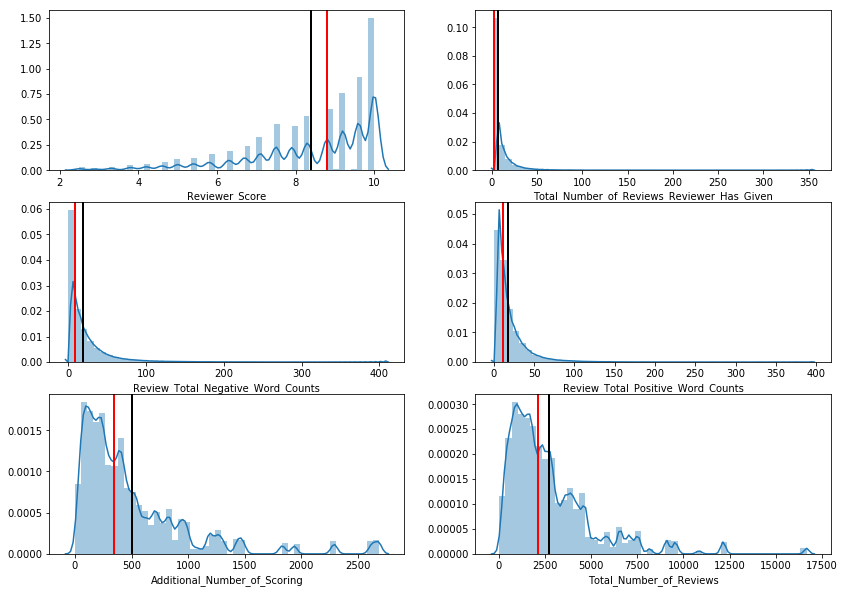

In [6]:
# plot distribution
fig, axes = plt.subplots(3, 2)
axes = axes.flatten()
fig.set_size_inches(14,10)

columns = ["Reviewer_Score", "Total_Number_of_Reviews_Reviewer_Has_Given", \
           "Review_Total_Negative_Word_Counts", "Review_Total_Positive_Word_Counts", \
           "Additional_Number_of_Scoring", "Total_Number_of_Reviews"]

for i, col in enumerate(columns):
    feature = part3_dataset[col]
    feature.dropna(inplace=True)
    sns.distplot(feature, label = col, ax = axes[i])
    axes[i].axvline(feature.mean(), linewidth=2, color="black")
    axes[i].axvline(feature.median(), linewidth=2, color="red")

<a id="step22"></a>
### step22: data proprocess to drop duplicates on Total_Number_of_Reviews for each hotel

In [7]:
# drop duplicates on Total_Number_of_Reviews for each hotel
tol_num_review = part3_dataset[["Total_Number_of_Reviews","Hotel_Name"]]
tol_num_review.set_index("Hotel_Name", inplace=True)
tol_num_review.drop_duplicates(inplace=True)

display(tol_num_review[:3])

/Users/TomLin/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Total_Number_of_Reviews
Hotel_Name,
Hotel Arena,1403
K K Hotel George,1831
Apex Temple Court Hotel,2619


<a id="step23"></a>
### step23: data process to drop duplicates on Average_Score for each hotel

In [8]:
# drop duplicates on Average_Score for each hotel
average_score = part3_dataset[["Average_Score","Hotel_Name"]]
average_score.set_index("Hotel_Name", inplace=True)
average_score.drop_duplicates(inplace=True)
display(average_score[:3])

/Users/TomLin/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Average_Score
Hotel_Name,
Hotel Arena,7.7
K K Hotel George,8.5
Apex Temple Court Hotel,9.2


<a id="step24"></a>
### step24: plot distribution for Total_Number_of_Reviews and Average_Score
As we can tell, distribution of the number of reviews each hotel has is right skewed. In addition, the average score of hotels are rather normal distributed.

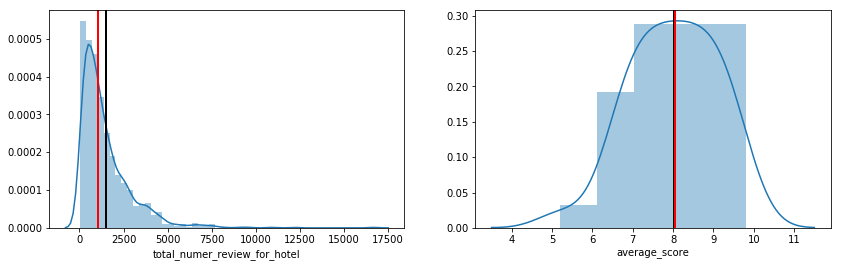

In [9]:
# plot distribution for Total_Number_of_Reviews and Average_Score
fig, axes = plt.subplots(1, 2)
axes = axes.flatten()
fig.set_size_inches(14,4)

sns.distplot(tol_num_review, axlabel = "total_numer_review_for_hotel", ax = axes[0])
axes[0].axvline(tol_num_review.mean()[0], linewidth=2, color="black")
axes[0].axvline(tol_num_review.median()[0], linewidth=2, color="red")

sns.distplot(average_score, axlabel = "average_score", ax = axes[1])
axes[1].axvline(average_score.mean()[0], linewidth=2, color="black")
axes[1].axvline(average_score.median()[0], linewidth=2, color="red")

<a id="step25"></a>
### step25: plot top 20 nationalities which account for the most reviews.
As we can tell, around half of the reviews are from UK(47%). The second largest group is from United States(6%), the third one is Australia(4%), and so on.

,counts,percentage
United Kingdom,244321,0.477242
United States of America,35108,0.068578
Australia,21502,0.042001
Ireland,14733,0.028779
United Arab Emirates,10170,0.019865
Saudi Arabia,8903,0.017391
Netherlands,8691,0.016976
Switzerland,8607,0.016812
Germany,7831,0.015297
Canada,7802,0.015240


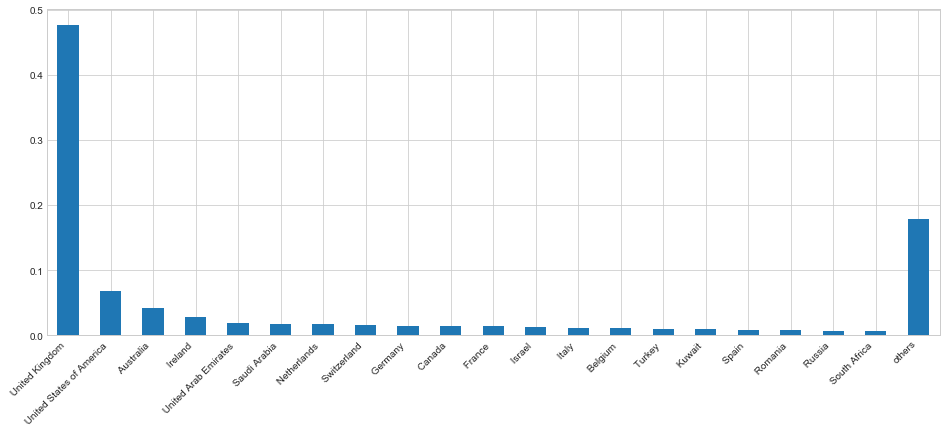

In [9]:
# plot top 20 nationalities which account for the most reviews
top_20 = part3_dataset.Reviewer_Nationality.value_counts()[:20]
other_countries = pd.Series(int(part3_dataset.Reviewer_Nationality.value_counts()[20:].sum()), \
                            index = ["others"])
new = pd.concat([top_20, other_countries])

new = new.to_frame(name="counts") # convert from series to dataframe
new["percentage"]= new.apply(lambda x: x/float(new.sum())) # compute the percentage

sns.set_style("whitegrid") # set up the plot configuration
g = new.percentage.plot(kind="bar", figsize=(16,6))
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

display(new)

<a id="step26"></a>
### step26: plot the boxplot on score distribution based on nationality
For there are too many countries. In order to show up the distribution of `Reviewer_Score` clearly on each country, I will choose only the top 15 countries with highest share on `Reviewer_Nationality`. The top 15 countries account for around 75% of the Reviewer_Nationality.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

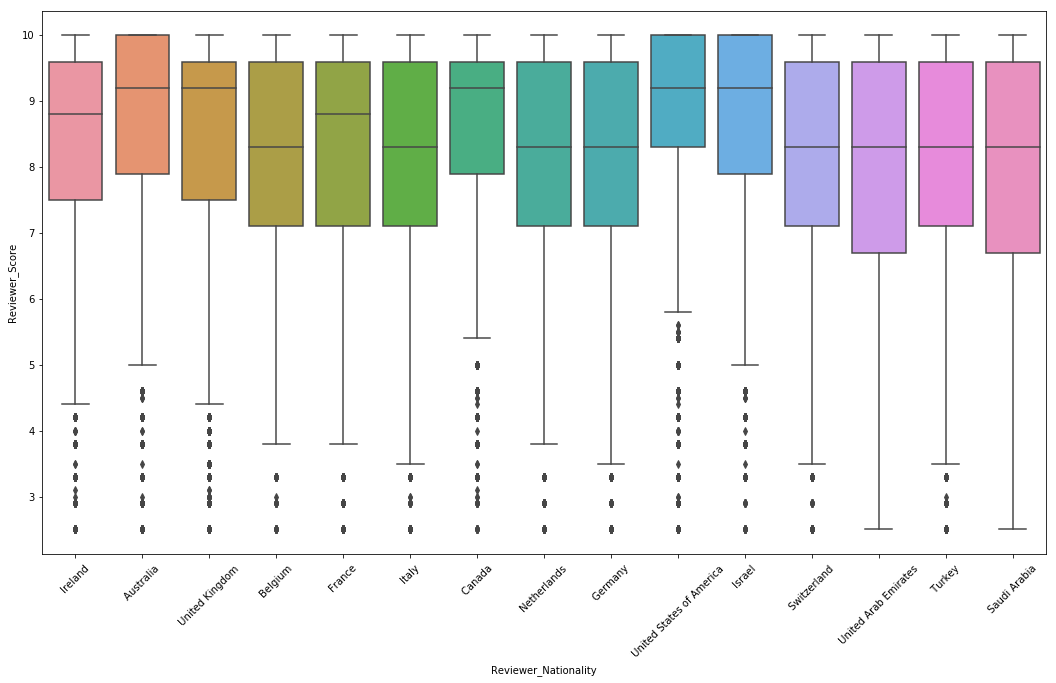

In [34]:
# boxplot on score distribution based on nationality
country_list = ["United Kingdom","United States of America",
                "Australia","Ireland","United Arab Emirates",
                "Saudi Arabia","Netherlands","Switzerland",
                "Germany","Canada","France","Israel","Italy",
                "Belgium","Turkey"]

# needed to strip out the string
subset_country = part3_dataset.loc[part3_dataset["Reviewer_Nationality"].str.strip().isin(country_list),:]

plt.figure(figsize=(18,10))
sns.boxplot(x = "Reviewer_Nationality", y = "Reviewer_Score", data=subset_country, orient="v")
plt.xticks(rotation=45)


<a id="step3"></a>
## step3: brief conclusion: think about if there is a way to reduce the number of countries as dummy variable
1. There are too many countries and only the UK dominates a great portion of dataset.
2. Maybe one solution is to merge countries by the geo-locational continent.
3. Or to adpot L1/L2 normalization (such as Lasso function) to drop out insignificant categories.<br/>
Ref: [Deal with many levels in dummy](https://stats.stackexchange.com/questions/275512/categorical-variables-with-too-many-levels-in-machine-learning)

<a id="step4"></a>
## step4: plot correlation matrix on numeric features
1. It seems like only `Total_Number_of_Reviews` and `Additional_Number_of_Scoring` has higher correlation.
2. The other minor one is `Reviewer_Score` and `Average_Score`. These seems to be quite reasonable. Others reveal  only very small correlations. 

['Additional_Number_of_Scoring',
 'Average_Score',
 'Review_Total_Negative_Word_Counts',
 'Total_Number_of_Reviews',
 'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Reviewer_Score',
 'lat',
 'lng']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Text xticklabel objects>)

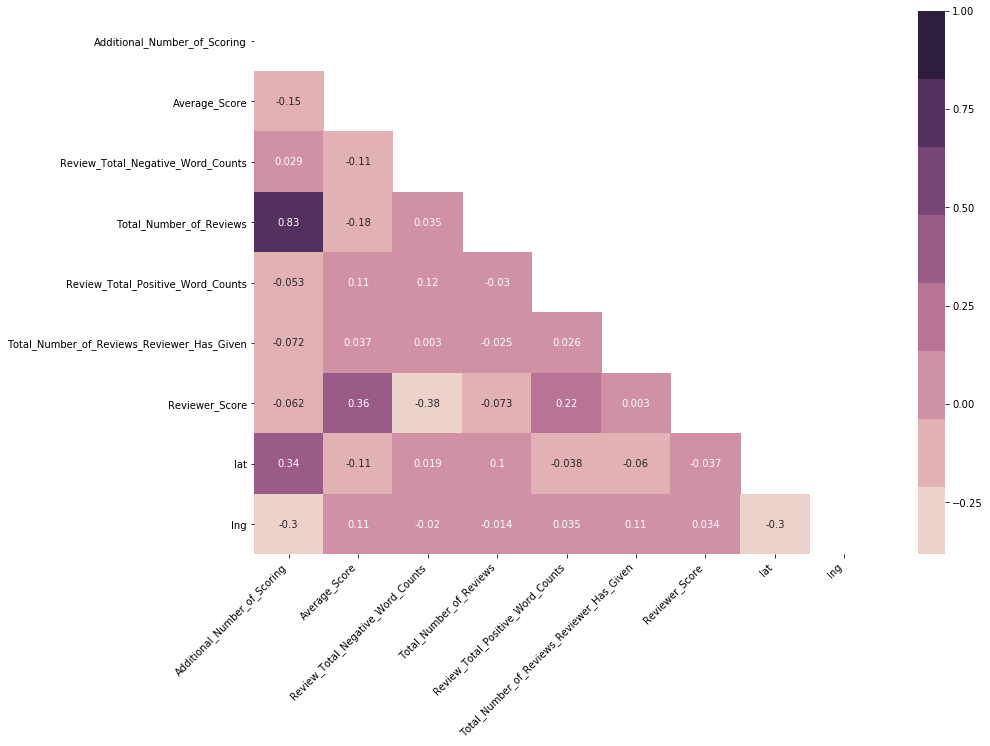

In [46]:
# plot correlation matrix
# function will detect and neglect the categorical features

# filter out numeric columns
numeric_cols = []
for col in part3_dataset.columns:
    if (part3_dataset[col].dtypes == np.float64) or (part3_dataset[col].dtypes == np.int64):
        numeric_cols.append(col)

display(numeric_cols)

# set up the plot configuration
plt.figure(figsize=(14,10))

corr = part3_dataset[numeric_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(part3_dataset.corr(), cmap = sns.cubehelix_palette(8), annot = True, mask = mask)
plt.xticks(rotation=45, ha='right')

<a id="step5"></a>
## step5: save the output as `part3_dataset.pickle`

In [14]:
part3_dataset.to_pickle("part3_dataset.pickle")